# Credit dataset (Classifcation)

# Dataset Description

This dataset contains information about the credit profiles of customers, along with other features such as age and education that may or may not affect the output variable. The dataset was collected from a financial company, where the individuals are customers.

The output variable in this dataset is 'Default Payment Next Month,' which refers to whether the customer will default or not. 'Default' means that the customer will not pay their credit bill, while 'non-default' means that the customer will pay their credit bill. In this dataset, the value '1' indicates default, and '0' indicates non-default.

It contains the following columns: 

Customer ID: A unique identifier for customers

Credit limit: The maximum amount that the customer can spend on his or her credit card

Age: How old the customer is in years

Education: The customer's highest education level (Highschool, Post Graduate, University) 

Marriage Status: Customer's marital status

Bill_Amount1: Customer credit card bill amount 1 month ago

Bill_Amount2: Customer credit card bill amount 2 month ago

Bill_Amount3: Customer credit card bill amount 3 month ago

Pay_Amount1: The amount customer paid 1 month ago

Pay_Amount2: The amount customer paid 2 month ago

Pay_Amount3: The amount customer paid 3 month ago

Default Payment Next Month: Target Variable.

I am to build a model which takes into account all the features such as age, payment history etc. thus predicting whether the customer will default or not.

In [38]:
#Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif 
from sklearn import metrics
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV , KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
import seaborn as sns
%matplotlib inline

# Data import + Processing

I used .replace and one-hot encoding to change the categorical features into numeric features for the model to process.

In [5]:
# Import data using pandas
data = pd.read_csv("credit_dataset.csv")
#Drop duplicates (if any)
data = data.drop_duplicates()
#Checking the size of dataset
print('Data shape:',data.shape, '\nData size:',data.size)

Data shape: (1600, 13) 
Data size: 20800


# Data visualzation

This is how i represent my data as features.

First I print out the data information

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 175.0+ KB


Then I check the  data for null values, which in this dataset there is none.

In [7]:
#Checking for missing values
print(data.isna().sum().sort_values())

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64


Next, I plotted the features as boxplots to get a better understanding of data, looking at the mean, median, range and  interquartile range of the data as well as checking for outliers

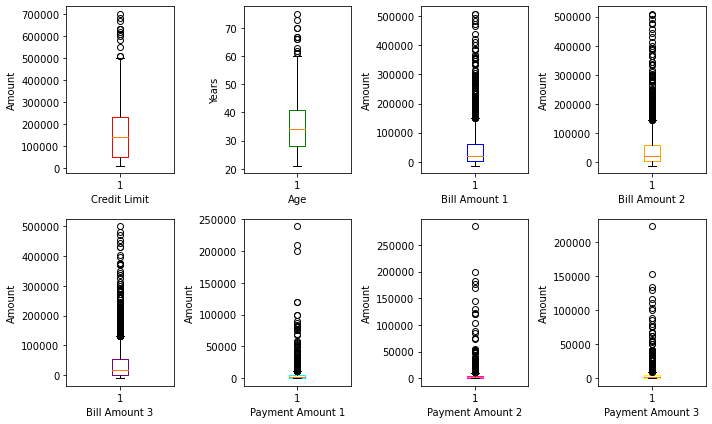

In [8]:
#Use boxplot to check for outliers


plt.figure(figsize=(10, 6))

plt.subplot(2, 4, 1)
plt.boxplot(data['Credit Limit'], boxprops=dict(color='red'))
plt.xlabel('Credit Limit')
plt.ylabel('Amount')

plt.subplot(2, 4, 2)
plt.boxplot(data['Age'], boxprops=dict(color='green'))
plt.xlabel('Age')
plt.ylabel('Years')

plt.subplot(2, 4, 3)
plt.boxplot(data['Bill_Amount1'], boxprops=dict(color='blue'))
plt.xlabel('Bill Amount 1')
plt.ylabel('Amount')

plt.subplot(2, 4, 4)
plt.boxplot(data['Bill_Amount2'], boxprops=dict(color='orange'))
plt.xlabel('Bill Amount 2')
plt.ylabel('Amount')

plt.subplot(2, 4, 5)
plt.boxplot(data['Bill_Amount3'], boxprops=dict(color='purple'))
plt.xlabel('Bill Amount 3')
plt.ylabel('Amount')

plt.subplot(2, 4, 6)
plt.boxplot(data['Pay_Amount1'], boxprops=dict(color='cyan'))
plt.xlabel('Payment Amount 1')
plt.ylabel('Amount')

plt.subplot(2, 4, 7)
plt.boxplot(data['Pay_Amount2'], boxprops=dict(color='magenta'))
plt.xlabel('Payment Amount 2')
plt.ylabel('Amount')

plt.subplot(2, 4, 8)
plt.boxplot(data['Pay_Amount3'], boxprops=dict(color='yellow'))
plt.xlabel('Payment Amount 3')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


Based on the boxplots, I can see that there are alot of outliers for each feature. Thus i decided to remove them.

In [9]:
#Removing outliers
IQR = data['Credit Limit'].quantile(0.75)-data['Credit Limit'].quantile(0.25)
Q3 = data['Credit Limit'].quantile(0.75)
data = data[data['Credit Limit'] < Q3+1.5*IQR]

IQR = data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
data = data[data['Age'] < Q3+1.5*IQR]

IQR = data['Bill_Amount1'].quantile(0.75)-data['Bill_Amount1'].quantile(0.25)
Q3 = data['Bill_Amount1'].quantile(0.75)
data = data[data['Bill_Amount1'] < Q3+1.5*IQR]

IQR = data['Bill_Amount2'].quantile(0.75)-data['Bill_Amount2'].quantile(0.25)
Q3 = data['Bill_Amount2'].quantile(0.75)
data = data[data['Bill_Amount2'] < Q3+1.5*IQR]

IQR = data['Bill_Amount3'].quantile(0.75)-data['Bill_Amount3'].quantile(0.25)
Q3 = data['Bill_Amount3'].quantile(0.75)
data = data[data['Bill_Amount3'] < Q3+1.5*IQR]

IQR = data['Pay_Amount1'].quantile(0.75)-data['Pay_Amount1'].quantile(0.25)
Q3 = data['Pay_Amount1'].quantile(0.75)
data = data[data['Pay_Amount1'] < Q3+1.5*IQR]

IQR = data['Pay_Amount2'].quantile(0.75)-data['Pay_Amount2'].quantile(0.25)
Q3 = data['Pay_Amount2'].quantile(0.75)
data = data[data['Pay_Amount2'] < Q3+1.5*IQR]

IQR = data['Pay_Amount3'].quantile(0.75)-data['Pay_Amount3'].quantile(0.25)
Q3 = data['Pay_Amount3'].quantile(0.75)
data = data[data['Pay_Amount3'] < Q3+1.5*IQR]

In [10]:
#Data after removal of outliers (-592)
data.shape

(1005, 13)

In [11]:
#Define the target as y
y = data['Default payment next month']
#Change the categorical data into numerical data
data['Gender'] = data['Gender'].replace({'male': 0, 'female': 1})
data['Marriage Status'] = data['Marriage Status'].replace({'single': 0, 'married': 1})
data.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,1,univeresity,1,24,3913,3102,689,0,689,0,1
1,2,120000,1,univeresity,0,26,2682,1725,2682,0,1000,1000,1
2,3,90000,1,univeresity,0,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,1,univeresity,1,37,46990,48233,49291,2000,2019,1200,0
5,6,50000,0,post-graduate,0,37,64400,57069,57608,2500,1815,657,0


In [12]:
#One Hot Encoding
education = pd.get_dummies(data['Education'], prefix='Education')
data.drop(['Education'], axis=1, inplace=True)
encoded_data = pd.concat([data, education], axis=1)
X = encoded_data.drop(['Default payment next month','Customer ID'], axis=1)

Next I plotted graphs to look at feature importances, on top of my own research.

This graph uses information gain to determine the importance of the feature. It calculates the reduction in entropy from the transformation of a dataset. Entrophy is a measure of how uncertain or mixed up the target variable's values are. A high entropy means the target variable is more uncertain, while a low entropy means it is more predictable.

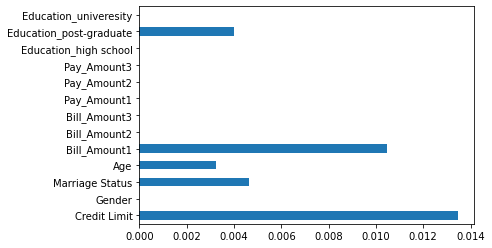

In [13]:
importances = mutual_info_classif (X, y)

feat_importances = pd.Series(importances, X.columns[:]) 
feat_importances.plot(kind='barh')
plt.show ()

This is a heatmap which i plotted the correlation matrix of the features to see the correlation between each variables. By doing so, I can determine which features are greatly correlation to one another and remove that variable, removing noise and preventing multicollinearity.

Multicollinearity causes problems to the model as it becomes challenging to interpret the impact of the individual features and other huge problems

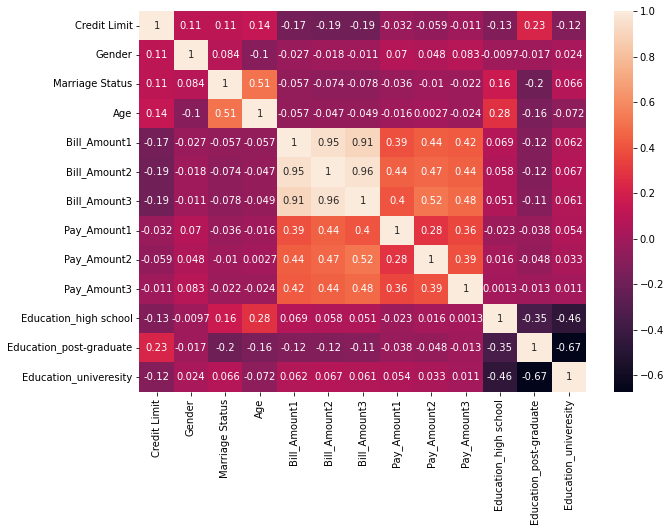

In [14]:
cor = X.corr()
plt.figure(figsize = (10,7))
sns.heatmap(cor,annot=True)
plt.show()

From this correlation heat map, I can see that the bill amounts have a strong positive correlation between each other and that the post graduate and university education have a strong negative correlation

# Feature selection

This is my research to determine which feature is redundant for predicting the output variable.

__GENDER__

I found a study which states:
"Moreover, single women, on balance, appear to have more intensive credit usage than single men
In particular, single women tend to have longer credit histories (measured as the age of the oldest account on one's credit record), higher total debt outstanding (at the median in particular), greater revolving credit utilization rates (for example, the ratio of balances to limits in credit card accounts), and higher installment loan balances."
https://www.federalreserve.gov/econres/notes/feds-notes/gender-related-differences-in-credit-use-and-credit-scores-20180622.html

This study shows that gender can play a role in the credit profile of the customer based on different tendencies the different gender has. Thus I decided to keep Gender.

__EDUCATION__

Education does not affect your credit score directly but at certain education levels might result in the individual need to pay off their student loans which might affect whether the individual is able to pay of their loans in time.

Income to debt ratio also can affect whether the individual is able to pay of their loans in time.
"If you ended up borrowing a lot of money in order to finish your education, you may owe a much higher amount of debt compared to your income ratio than someone who didn’t have to use loans to finance their education. What this means is that you owe a high percentage of your income to debt and it can most definitely affect your creditworthiness."

https://moneyinc.com/how-can-your-education-impact-your-credit-score-or-does-it/

Thus even though education does not affect your credit score directly, it can affect whether you can pay off your bills in time as you also have loans to consider thus I decided to keep Education, although I think it does not have such a great importance as compared to some of the other features.

__CREDIT LIMIT__

"Increasing your credit limit could lower your credit utilization ratio. If your spending habits stay the same, you could boost your credit score if you continue to make your monthly payments on time. But if you drastically increase your spending with your increased credit limit, you could hurt your credit score."

https://www.chase.com/personal/credit-cards/education/basics/will-credit-limit-increase-hurt-score

To get higher credit limit u need to make payments on time and also show that you have the means to borrow more credit which shows that you have a high creditworthiness

Thus it creates a pattern where customers with lower credit limit to not pay their bills as they have a lower creditworthiness and customers with a very high credit limit are more likely to pay off their bills. Hence I decided to keep Credit Limit.

__MARRIAGE STATUS__

Marrying a person with a bad credit history won't affect your own credit record and will not affect your own credit score.
Only if take joint debt and if your spouse doesnt pay then it will affect the credit score.

Since we are looking at the individual customer's account, marital status will not affect the likelihood of the customer defaulting thus I decided not to keep the Marriage Status column.

__AGE__

When making lending decisions, lenders review your credit history to determine how likely you are to repay your loan on time. A longer history shows you have more experience using credit, while a short credit history shows you have less experience.

"There seems to be an association of declining defaults as one progresses from the age of low 20s to early 30s and then there is a slow but steady increase of default rates from people aged in the early 30s to people aged in the early 50s."

https://nycdatascience.com/blog/student-works/credit-card-defaults-education-and-age-are-they-related/#:~:text=Credit%20Card%20Defaults%20and%20Age&text=There%20seems%20to%20be%20an,aged%20in%20the%20early%2050s.

Since age and age of credit history have a correlation with whether the customer defaults, I decided to keep the Age column.


__PAYMENT HISTORY (Bill_Amount and Pay_Amount)__

Payment history can show how reliable a consumer is when it comes to repaying debt. It’s also included in your credit report and an important factor in credit scoring formulas—accounting for at least 35% of some credit scores. 

The number of accounts you’ve paid on time

How long overdue your payments are or have been in the past

The number of times that past due items appear in your credit history

How much time has passed since you’ve had delinquencies, collections items or bankruptcies

The better your payment history, the better your credit score might be.

https://www.capitalone.com/learn-grow/money-management/payment-history/

Payment history seems to be one of the most important feature when looking at the likelihood of whether the customer will default or not. This could be because of how payment history might show the habits of the customer, showing that they often do or do not default and since habits are hard to break, it is quite a reliable feature to predict the likelihood of whether the customer will default or not. Thus I decided to keep the payemnt history columns, Bill_Amount and Pay_Amount.

# Selecting columns

Based on the previous section on feature selection, I have decided the columns I want to drop and keep. However, I have to also take into account other factors such as preventing multicollinearity. 

Thus from my correlation heatmap, I decided to Education_post-graduate, Bill_Amount2 and Bill_Amount3 on top of Marriage Status.
This is because Education_post-graduate and Education_university have a moderately strong negative linear relationship with a correlation coefficient of -0.67 and Bill_Amount 1 have a strong positive linear relationship with Bill_Amount2 and Bill_Amount3 with a correlation coefficient of 0.95 and 0.91 respectively.

In [15]:
#Selecting Columns
X_df = X.drop(['Marriage Status','Education_post-graduate','Bill_Amount2','Bill_Amount3'], axis=1)
X = X_df.values

# Train-Test Split

I used the train_test_split code to split my code into two parts. 80% of the data will go into train where it will be used to train my model and 20% will go into test where it will be used to test my trained model. I also stratified it so that the distribution between the train and the test will be about the same.

In [16]:
#Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3, stratify = y)

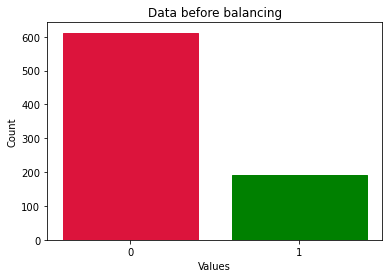

In [17]:
#Checking for imbalanced data
count = y_train.value_counts()
barplot = plt.bar(count.index, count.values)
barplot[0].set_color('crimson')
barplot[1].set_color('green')
plt.title('Data before balancing')
plt.xticks([0,1])
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()


# Balancing Data

I decided to balance the dataset after the train test split as based on my understanding, the train dataset is the only part that is supposed to be balance since its the dataset training the model thus balancing the test might lead to a higher but unrealistic accuracy since the data that the model is trying to predict is balanced.

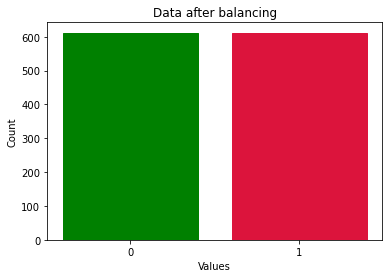

In [18]:
#Oversample minority data to counter imbalanced data

#create two different dataframe of majority and minority class 
y_majority = y_train[(y_train==0)] 
y_minority = y_train[(y_train==1)] 
X_majority = X_train[(y_train==0)] 
X_minority = X_train[(y_train==1)] 
# upsample minority class
X_upsample, y_upsample = resample(X_minority, y_minority, 
                        replace=True,   # sample with replacement
                        n_samples= len(y_majority),  # to match majority class
                        random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
balanced_y_train = pd.concat([y_upsample, y_majority])

#create two different dataframe of majority and minority class 

X_oversample_df = pd.DataFrame(X_upsample, columns=X_df.columns)
X_majority_df = pd.DataFrame(X_majority, columns=X_df.columns)

# Combine majority class with upsampled minority class
balanced_x_train = pd.concat([X_oversample_df, X_majority_df])
balanced_x_train = balanced_x_train.values

#Check if data is upsampled successfully
count = balanced_y_train.value_counts()
barplot = plt.bar(count.index, count.values)
barplot[0].set_color('crimson')
barplot[1].set_color('green')
plt.title('Data after balancing')
plt.xticks([0,1])
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

# Deciding what model to use

I decided not to use the KNN(K-Nearest Neighbour model) as I consider the dataset to be moderately big and KNN is not very good at handling large datasets.

I decided not to use Naive Bayes as it assumes every feature is independent which is will most likely not be the case in a real world scenario , including this dataset. Also after some research, many says that it is known as a bad estimator and we should not take its probablity outputs too seriously.

I decided not to use Decision Tree as Gradient Boosting and Random Forest are said to get a better accuracy than Decision Tree

I decided not to use Logistic Regression as it assumes absence of multicollinearity which is not fully the case since some of the data have a weak linear relationship between each other.

I decided to use Gradient Boosting, which uses more simple models like Decision Tree to minimise the residual made by the previous model. It first makes one prediction and finds out the “error” it made, then uses a model to make a new prediction and so on and so forth. It is good for datasets that have a moderate to large size.

I decided to use Random Forest, which is almost the same as Gradient Boosting but rather than looking at a previous model's result and using another simple model to try and make a better prediction, it is made of a bunch of trees.These trees are made independently with a random set of data. Each tree is also looks at a different feature which is also randomly selected. Tree or decision tree is a model that uses a bunch of splits under different feature and finds the best routes to take to predict the outcome based on the data given. It is good for datasets that have a moderate to large size.

I decided to use SVM(Support Vector Machine), which maps data into a higher dimension high-dimensional feature space so that data can be categorize even if the data is not linearly separable.It is more effective in high dimensional spaces and is relatively memory efficient.

# Model Building

I used Pipeline so that I can chain together a sequence of steps such as scaling my data in putting it into my model.
I then used KFold for cross-validation where the dataset is divided into K subsets or folds of approximately equal size and the model is trained n times, each time using n-1 folds as the training set and the remaining fold as the validation set.

# Hyperparameters

I did not have to manually check which hyperparameters is the best for my model as I can use GridSearchCV or RandomizedSearchCV to find the best hyperparameters. By using RandomizedSearchCV, it will choose a random set of hyperparameters to use and find out which set is the best. This saves alot of time however it might not get the best set in the first try. GridSearchCV one the other hand will go through all possible iterations which is very accurate but takes up alot of time.

I also imported sp_randFloat and sp_randInt so that I can easily input all possible ranges of the hyperparameter.

# Dummy Baseline


Balanced test results

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       153
           1       0.00      0.00      0.00        48

    accuracy                           0.76       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.58      0.76      0.66       201



C:\Users\beark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\beark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\beark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


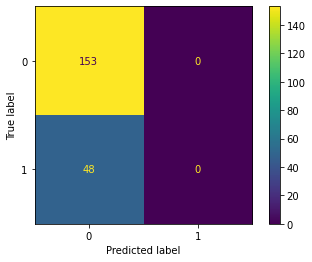

C:\Users\beark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(balanced_x_train)
X_test_scaled = scaler.transform(X_test)

dummy_class = DummyClassifier(strategy="most_frequent")
dummy_class.fit(X_train_scaled, balanced_y_train)
dpred = dummy_class.predict(X_test_scaled)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, dpred))
cm = metrics.confusion_matrix(y_test,  dpred, labels= dummy_class.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dummy_class.classes_)
disp.plot()
plt.show()

dprecision = precision_score(y_test, dpred)
drecall = recall_score(y_test, dpred)
df1 = f1_score(y_test, dpred)
daccuracy = accuracy_score(y_test, dpred)

# SVM (Support Vector Machine)

For SVM, I used RandomizedSearchCV since it requires very precise hyperparameter tuning for SVM to get a good result.Thus, if I used GridSearchCV, I would only be able to put in an array of about 5 numbers without the model taking too long for it to process. Hence I used RandomizedSearchCV.

Best score and best parameter
0.8169989963198393 {'svm__C': 0.8272480568061659, 'svm__gamma': 0.7754294363292659, 'svm__kernel': 'rbf'}

Balanced test results

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       153
           1       0.36      0.35      0.36        48

    accuracy                           0.70       201
   macro avg       0.58      0.58      0.58       201
weighted avg       0.69      0.70      0.70       201



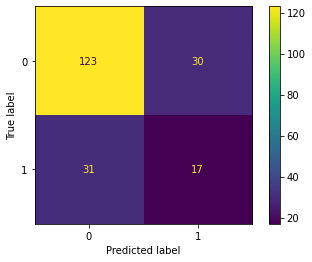

In [28]:
#Balanced and scaled
steps = [('scaler', StandardScaler()),('svm',SVC(random_state=12))]
pipeline = Pipeline(steps)
parameters = {'svm__C':sp_randFloat,
              'svm__gamma': sp_randFloat,
              'svm__kernel': ['linear', 'rbf']
             }
kf = KFold(n_splits=5, shuffle=True, random_state=42)

SVM = RandomizedSearchCV(pipeline, param_distributions = parameters,
                               cv = kf, n_iter = 20)
SVM.fit(balanced_x_train, balanced_y_train)
balanced_test_prediction = SVM.predict(X_test)

#Show best score and parameter
print("Best score and best parameter")
print(SVM.best_score_, SVM.best_params_)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, balanced_test_prediction))
cm = metrics.confusion_matrix(y_test, balanced_test_prediction, labels=SVM.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
disp.plot()
plt.show()



I used RandomizedSearchCv instead of GridSearchCV since SVM has alot of hyperparameters to tune thus if i had used GridSearchCV, it would have taken a large amount of time just to the result.
Since I used Randomize Search, I rerun the code 5 times to make sure I get a good set of settings for my SVM. These are the results:

1)
Best score and best parameter
0.8306022896963665 {'svm__C': 0.7198293756641614, 'svm__gamma': 0.9575805151591693, 'svm__kernel': 'rbf'}
Area under curve
0.542478354978355
Accuracy: 0.67


2)
Best score and best parameter
0.809424257507881 {'svm__C': 0.8355671851751686, 'svm__gamma': 0.7279078088441935, 'svm__kernel': 'rbf'}
Area under curve score
0.5692640692640693
Accuracy: 0.68


3)
Best score and best parameter
0.8020839555334328 {'svm__C': 0.8765722104932512, 'svm__gamma': 0.6593875370253776, 'svm__kernel': 'rbf'}
Area under curve score
0.5764339826839827
Accuracy: 0.69


4)
0.8208329185332671 {'svm__C': 0.74297798337618, 'svm__gamma': 0.8456440495333509, 'svm__kernel': 'rbf'}
Area under curve score
0.5549242424242424
Accuracy: 0.67


5)
0.8322349427575908 {'svm__C': 0.7853100755565698, 'svm__gamma': 0.9377441665590154, 'svm__kernel': 'rbf'}
Area under curve score
0.5412608225108225
Accuracy: 0.68

From the results, 3 seems to have the best results with an area under curve score of 0.576 and an accuracy of 0.69

# Final SVM model


Balanced test results

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       153
           1       0.36      0.40      0.38        48

    accuracy                           0.69       201
   macro avg       0.58      0.59      0.58       201
weighted avg       0.70      0.69      0.69       201



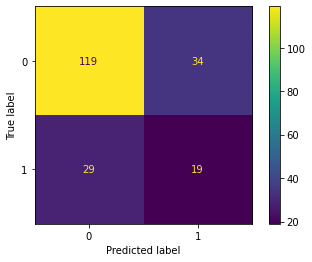

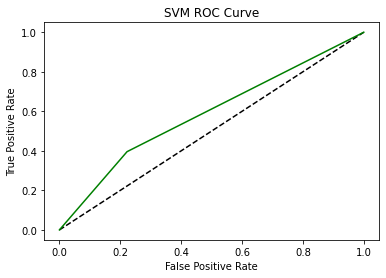

Area under curve score
0.5868055555555556


In [42]:
scaler = StandardScaler()
balanced_x_train_scaled = scaler.fit_transform(balanced_x_train)
balanced_x_test_scaled = scaler.transform(X_test)
SVM = SVC(
    C = 0.8765722104932512,
    gamma = 0.6593875370253776,
    kernel ='rbf',
    random_state=12
)
SVM.fit(balanced_x_train_scaled,balanced_y_train)
svm_balanced_test_prediction = SVM.predict(balanced_x_test_scaled)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, svm_balanced_test_prediction))
cm = metrics.confusion_matrix(y_test, svm_balanced_test_prediction, labels=SVM.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
disp.plot()
plt.show()

#ROC Curve
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_balanced_test_prediction)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(svm_fpr, svm_tpr,'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.show()

#Print Area Under ROC curve
print("Area under curve score")
print(roc_auc_score(y_test, svm_balanced_test_prediction))

svm_precision = precision_score(y_test, svm_balanced_test_prediction)
svm_recall = recall_score(y_test, svm_balanced_test_prediction)
svm_f1 = f1_score(y_test, svm_balanced_test_prediction)
svm_accuracy = accuracy_score(y_test, svm_balanced_test_prediction)

When compared to the dummy baseline, my model performs slightly better. My area under curve score is 0.589 while the dummy baseline is 0.50

I evaluated my model by printing out a classification report. This shows the model's precision, recall, f1-score and the overall accuracy.

__Precision__

My model had a precision of 0.80 for predicting the outcome of 0 and a precision of 0.36 for predicting the outcome of 1. Since precision is calculated by the True Positive divided by sum of True Positive and False Positive, this meant that when my model predicts the outcome of 0, 80% of the time it is correct. However my model struggles with the outcome of 1 as when my model predicts the outcome of 1, 36% of the time it is correct.

__Recall__ 

My model had a recall of 0.78 for predicting the outcome of 0 and a recall of 0.40 for predicting the outcome of 1. Since recall is calculated by the True Positive divided by sum of True Positive and False Negative, this meant that my model predicted 78% of the 0 outcome correctly but only predicted 40% of the 1 outcomes correctly.

__F1-score__ 

My model had a f1-score of 0.79 for predicting the outcome of 0 and a f1-score of 0.38 for predicting the outcome of 1. Since f1-score is calculated by 2 times the mulitplication of precision and recall divided by the sum of precision and recall, this meant that when predicting the outcome of 0, my model has a good balance between precision and recall, having a low False Negative rate. When predicting the outcome of 1, my model fails to have a good balance between precision and recall, thus having a slightly high False Positive rate.

__Accuracy__ 

Accuracy is calculated by the sum of True Positive and True Negative divided by the sum of all the outputs. This shows the percentage of outcomes the model predicted correctly which in my case is 69%

# Random Forest

Best score and best parameter
0.7654934760789562 {'rf__max_depth': 7, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 566}

Balanced test results

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       153
           1       0.33      0.38      0.35        48

    accuracy                           0.67       201
   macro avg       0.56      0.57      0.56       201
weighted avg       0.68      0.67      0.67       201



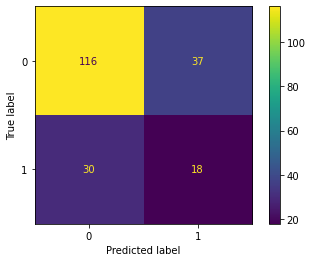

In [30]:
#Balanced and scaled
steps = [('scaler', StandardScaler()),('rf',RandomForestClassifier(random_state=12))]
pipeline = Pipeline(steps)
parameters = {'rf__n_estimators': sp_randInt(10,1000),
              'rf__max_depth': sp_randInt(4,10),
              'rf__min_samples_split': sp_randInt(2,10),
              'rf__min_samples_leaf': sp_randInt(2,100)
             }
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Rf = RandomizedSearchCV(pipeline, param_distributions = parameters,
                               cv = kf, n_iter = 20)

Rf.fit(balanced_x_train, balanced_y_train)
balanced_test_prediction = Rf.predict(X_test)

#Show best score and parameter
print("Best score and best parameter")
print(Rf.best_score_, Rf.best_params_)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, balanced_test_prediction))
cm = metrics.confusion_matrix(y_test, balanced_test_prediction, labels=Rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rf.classes_)
disp.plot()
plt.show()

I used RandomizedSearchCV instead of GridSearchCV as Random Forest has alot of hyperparameters to tune so using GridSearch will take alot of computer memory and time just to get the result.
Since I used Randomize Search, I rerun the code 5 times to make sure I get a good set of settings for my Random Forest Model. These are the results:

1)
0.7686875725900115 {'rf__max_depth': 9, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 494}
 Area under curve score
 0.579656862745098
 Accuracy: 0.69

2)
0.7686908909905426 {'rf__max_depth': 9, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 9, 'rf__n_estimators': 171}
 Area under curve score
 0.5725081699346406
 Accuracy: 0.69

3)
0.7475062220009955 {'rf__max_depth': 8, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 5, 'rf__n_estimators': 441}
 Area under curve score
 0.584280303030303
 Accuracy: 0.68

4)
0.7173552347768376 {'rf__max_depth': 6, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 6, 'rf__n_estimators': 586}
 Area under curve score
 0.590232683982684
 Accuracy: 0.65

5)
0.7532105525136883 {'rf__max_depth': 9, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 8, 'rf__n_estimators': 405}
 Area under curve score
 0.5810335497835497
 Accuracy: 0.68
 
From the results, number 1 seems to be the best as it has a best score of 0.768, area under curve of 0.580 and an accuracy of 0.69

# Final Random Forest Model


Balanced test results

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       153
           1       0.35      0.38      0.36        48

    accuracy                           0.69       201
   macro avg       0.58      0.58      0.58       201
weighted avg       0.69      0.69      0.69       201



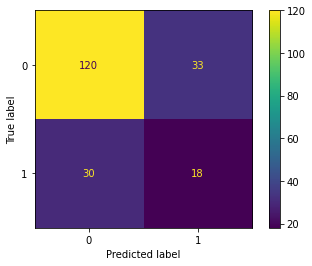

In [43]:
scaler = StandardScaler()
balanced_x_train_scaled = scaler.fit_transform(balanced_x_train)
balanced_x_test_scaled = scaler.transform(X_test)
Rf = RandomForestClassifier( 
    max_depth = 9,
    min_samples_leaf = 5,
    min_samples_split = 2,
    n_estimators = 494,
    random_state=12
)
Rf.fit(balanced_x_train_scaled,balanced_y_train)
rf_balanced_test_prediction = Rf.predict(balanced_x_test_scaled)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, rf_balanced_test_prediction))
cm = metrics.confusion_matrix(y_test, rf_balanced_test_prediction, labels=Rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rf.classes_)
disp.plot()
plt.show()

rf_precision = precision_score(y_test, rf_balanced_test_prediction)
rf_recall = recall_score(y_test, rf_balanced_test_prediction)
rf_f1 = f1_score(y_test, rf_balanced_test_prediction)
rf_accuracy = accuracy_score(y_test, rf_balanced_test_prediction)

I evaluated my model by printing out a classification report. This shows the model's precision, recall, f1-score and the overall accuracy. 

__Precision__

My model had a precision of 0.80 for predicting the outcome of 0 and a precision of 0.35 for predicting the outcome of 1. Since precision is calculated by the True Positive divided by sum of True Positive and False Positive, this meant that when my model predicts the outcome of 0, 80% of the time it is correct. However my model struggles with the outcome of 1 as when my model predicts the outcome of 1, 35% of the time it is correct.

__Recall__

My model had a recall of 0.78 for predicting the outcome of 0 and a recall of 0.38 for predicting the outcome of 1. Since recall is calculated by the True Positive divided by sum of True Positive and False Negative, this meant that my model predicted 78% of the 0 outcome correctly but only predicted 38% of the 1 outcomes correctly.

__F1-score__

My model had a f1-score of 0.79 for predicting the outcome of 0 and a f1-score of 0.36 for predicting the outcome of 1. Since f1-score is calculated by 2 times the mulitplication of precision and recall divided by the sum of precision and recall, this meant that when predicting the outcome of 0, my model has a good balance between precision and recall, having a low False Negative rate. When predicting the outcome of 1, my model fails to have a good balance between precision and recall, thus having a slightly high False Positive rate.

__Accuracy__

Accuracy is calculated by the sum of True Positive and True Negative divided by the sum of all the outputs. This shows the percentage of outcomes the model predicted correctly which in my case is 69%

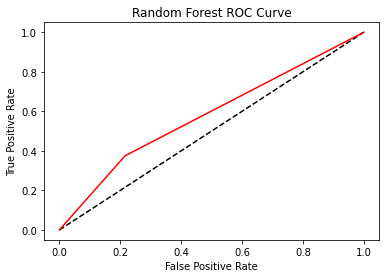

Area under curve score
0.579656862745098


In [32]:
#ROC Curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_balanced_test_prediction)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr,'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

#Print Area Under ROC curve
print("Area under curve score")
print(roc_auc_score(y_test, rf_balanced_test_prediction))

When compared to the dummy baseline, my model performs slightly better. My area under curve score is 0.580 while the dummy baseline is 0.50

# Gradient Boosting

Best score and best parameter
0.8766276346604215 {'gbc__learning_rate': 0.7207305849104078, 'gbc__max_depth': 7, 'gbc__n_estimators': 324, 'gbc__subsample': 0.6085587896248075}

Balanced test results

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       153
           1       0.24      0.17      0.20        48

    accuracy                           0.67       201
   macro avg       0.50      0.50      0.49       201
weighted avg       0.64      0.67      0.65       201



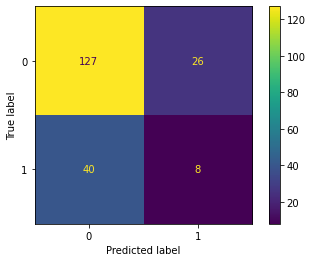

In [33]:
#Balanced and scaled
steps = [('scaler', StandardScaler()),('gbc',GradientBoostingClassifier(random_state=12))]
pipeline = Pipeline(steps)
parameters = {'gbc__learning_rate': sp_randFloat(),
                  'gbc__subsample'    : sp_randFloat(),
                  'gbc__n_estimators' : sp_randInt(100, 1000),
                  'gbc__max_depth'    : sp_randInt(4, 10),
                 }
kf = KFold(n_splits=5, shuffle=True, random_state=42)

randm_src = RandomizedSearchCV(pipeline, param_distributions = parameters,
                               cv = kf, n_iter = 5)
randm_src.fit(balanced_x_train, balanced_y_train)
balanced_test_prediction = randm_src.predict(X_test)

#Show best score and parameter
print("Best score and best parameter")
print(randm_src.best_score_, randm_src.best_params_)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, balanced_test_prediction))
cm = metrics.confusion_matrix(y_test, balanced_test_prediction, labels=randm_src.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=randm_src.classes_)
disp.plot()
plt.show()

For Gradient Boosting, I used RandomizedSearchCV as I have alot of hyperparameters to tune and thus if I used GridSearchCV it would take a long time since it will go through all possible iterations.
Since I used Randomize Search, I rerun the code 5 times to make sure I get a good set of settings for my Gradient Boosting Model. These are the results:

1)
Best score and best parameter
0.8978655068584811 {'gbc__learning_rate': 0.5802244737040098, 'gbc__max_depth': 9, 'gbc__n_estimators': 155, 'gbc__subsample': 0.8117846182766083}
Area under curve score
0.5343137254901961
Accuracy: 0.73

2)
Best score and best parameter
0.8848009367681499 {'gbc__learning_rate': 0.03733933596266892, 'gbc__max_depth': 7, 'gbc__n_estimators': 830, 'gbc__subsample': 0.534348028481243}

Area under curve score
0.5381944444444444
Accuracy: 0.72

3)
Best score and best parameter
0.8933233781317405 {'gbc__learning_rate': 0.04521251934663795, 'gbc__max_depth': 9, 'gbc__n_estimators': 446, 'gbc__subsample': 0.8201906516009332}
Area under curve score
0.541801948051948
Accuracy: 0.72

4)
Best score and best parameter
0.8848042823686851 {'gbc__learning_rate': 0.30935534327574143, 'gbc__max_depth': 8, 'gbc__n_estimators': 296, 'gbc__subsample': 0.8274762244426115}
Area under curve score
0.5518790849673203
Accuracy:0.73

5)
Best score and best parameter
0.8774272331883572 {'gbc__learning_rate': 0.9682976211300911, 'gbc__max_depth': 8, 'gbc__n_estimators': 279, 'gbc__subsample': 0.9695420323723906}
Area under curve score
0.5616830065359477
Accuracy: 0.75

From the results, I can see that number 5 is the best with a best score of 0.877 and an area under curve of 0.562 since it has the best accuracy of 0.75

# Final Gradient Boosting Model (Most Accurate Model)


Balanced test results

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       153
           1       0.43      0.21      0.28        48

    accuracy                           0.75       201
   macro avg       0.61      0.56      0.56       201
weighted avg       0.70      0.75      0.71       201



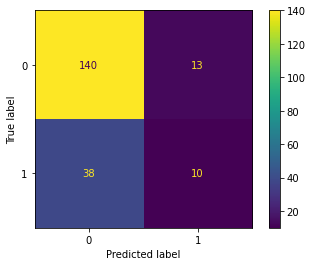

In [44]:
scaler = StandardScaler()
balanced_x_train_scaled = scaler.fit_transform(balanced_x_train)
balanced_x_test_scaled = scaler.transform(X_test)
Gbc = GradientBoostingClassifier(
    learning_rate = 0.9682976211300911, 
    max_depth = 8,
    n_estimators = 279,
    subsample =  0.9695420323723906 ,
    random_state=12
)
Gbc.fit(balanced_x_train_scaled,balanced_y_train)
balanced_test_prediction = Gbc.predict(balanced_x_test_scaled)

#Show classification report and confusion matrix
print("\nBalanced test results\n")
print(metrics.classification_report(y_test, balanced_test_prediction))
cm = metrics.confusion_matrix(y_test, balanced_test_prediction, labels=Gbc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Gbc.classes_)
disp.plot()
plt.show()


gbc_precision = precision_score(y_test, balanced_test_prediction)
gbc_recall = recall_score(y_test, balanced_test_prediction)
gbc_f1 = f1_score(y_test, balanced_test_prediction)
gbc_accuracy = accuracy_score(y_test, balanced_test_prediction)

# Gradient Boosting Evaluation

I evaluated my model by printing out a classification report. This shows the model's precision, recall, f1-score and the overall accuracy. 

__Precision__

My model had a precision of 0.79 for predicting the outcome of 0 and a precision of 0.43 for predicting the outcome of 1. Since precision is calculated by the True Positive divided by sum of True Positive and False Positive, this meant that when my model predicts the outcome of 0, 79% of the time it is correct. However my model struggles with the outcome of 1 as when my model predicts the outcome of 1, 43% of the time it is correct.

__Recall__

My model had a recall of 0.92 for predicting the outcome of 0 and a recall of 0.21 for predicting the outcome of 1. Since recall is calculated by the True Positive divided by sum of True Positive and False Negative, this meant that my model predicted 92% of the 0 outcome correctly but only predicted 21% of the 1 outcomes correctly.

__F1-score__

My model had a f1-score of 0.85 for predicting the outcome of 0 and a f1-score of 0.28 for predicting the outcome of 1. Since f1-score is calculated by 2 times the mulitplication of precision and recall divided by the sum of precision and recall, this meant that when predicting the outcome of 0, my model has a good balance between precision and recall, having a low False Negative rate. When predicting the outcome of 1, my model fails to have a good balance between precision and recall, thus having a high False Positive rate.

__Accuracy__

Accuracy is calculated by the sum of True Positive and True Negative divided by the sum of all the outputs. This shows the percentage of outcomes the model predicted correctly which in my case is 75%

# Gradient Boosting ROC Curve

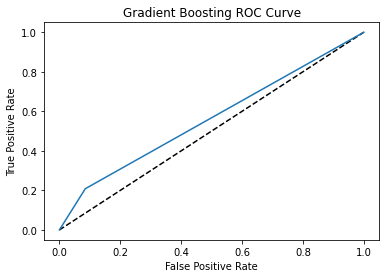

Area under curve score
0.5616830065359477


In [35]:
#ROC Curve
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, balanced_test_prediction)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(gb_fpr, gb_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.show()

#Print Area Under ROC curve
print("Area under curve score")
print(roc_auc_score(y_test, balanced_test_prediction))

When compared to the dummy baseline, my model performs only just slighly better than it. My area under curve score is 0.562 while the dummy baseline is 0.50

# Gradient Boosting Model's Feature Importance

Credit Limit, Score: 0.112
Gender, Score: 0.024
Age, Score: 0.128
Bill_Amount1, Score: 0.230
Pay_Amount1, Score: 0.160
Pay_Amount2, Score: 0.166
Pay_Amount3, Score: 0.143
Education_high school, Score: 0.021
Education_univeresity, Score: 0.017


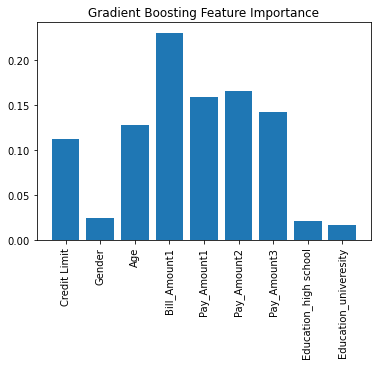

In [36]:
importance = Gbc.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('%s, Score: %.3f' % (X_df.columns[i], v))
# plot feature importance
plt.bar(X_df.columns, importance)
plt.title("Gradient Boosting Feature Importance")
plt.xticks(rotation=90)
plt.show()

The model feels that education is the less important feature which links back to my research where I said that it does not have such a great importance as compared to some of the other features. 

Gender was also another feature the model thinks it is not as important which is understandable as logically speaking gender will not affect whether the customer default or not, however I kept it in due to a study which founds a difference in the way the different genders behave.

As expected Payment history has the most importance with Bill_Amount1 having the greatest importance among the features.

The surprising thing is Age having such a great importance that it is almost as important as payment history. This was unexpected due to the fact I expect Age to have some effect on outcome variable, but i did not expect it to have such a huge importance.

# Final ROC Curve

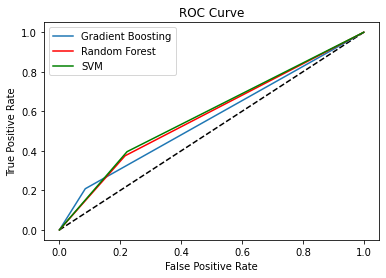

In [37]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
plt.plot(rf_fpr, rf_tpr,'r', label='Random Forest')
plt.plot(svm_fpr, svm_tpr,'g', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

From this ROC Curve, I can tell that even though Gradient Boosting has the highest accuracy of 0.75, SVM has the best Area Under Curve of about 0.587

__Errors__

From this, I can tell that my model struggles when it comes to predicting the outcome of 1, having predicted 38 False Negatives out of 48 for Gradient Boosting,30 out of 48 and 31 out of 48 for SVM. I can tell that Gradient Boosting struggled the most as it has the highest number of False Negatives and also has a low area under curve score of 0.532. This could be deal to the fact that the test is not balanced which makes it harder for the model to predict correctly however if I balanced the test it will over inflate the accuracy of my model, making it seem better than it actually is.

# Overall Comparison

In [45]:
# Create data for the dataframe
overall_data = {
    'precision': [svm_precision, rf_precision,gbc_precision, dprecision],
    'recall': [svm_recall, rf_recall, gbc_recall, drecall],
    'f1-score': [svm_f1, rf_f1, gbc_f1, df1],
    'accuracy': [svm_accuracy, rf_accuracy, gbc_accuracy, daccuracy]
}

# Create the dataframe with index
overall_df = pd.DataFrame(overall_data, index=['SVM', 'Random Forest', 'Gradient Boosting','Dummy Baseline'])

# Display the dataframe
overall_df

,precision,recall,f1-score,accuracy
SVM,0.358491,0.395833,0.376238,0.686567
Random Forest,0.352941,0.375000,0.363636,0.686567
Gradient Boosting,0.434783,0.208333,0.281690,0.746269
Dummy Baseline,0.000000,0.000000,0.000000,0.761194


# System's Performance Against the Dummy Baseline

From the table, even though i can see that the dummy has a higher accuracy, its precision, recall and f1-score are all 0 even though I used the balanced data.

This means that my system with a mean precision of 0.382 is much better than the dummy baseline even though with comparing anything a precision of 0.382 is not very good.

My system has a mean recall of 0.326 which is much better than the dummy baseline even though with comparing anything a recall of 0.326 is not very good.

My system has a mean f1-score of 0.341 which is much better than the dummy baseline even though with comparing anything a f1-score of 0.341 is not very good.

My system has a mean accuracy of 0.706 which is is not better than the dummy baseline with an accuracy of 0.76. However, looking at the fact the dummy has a precision, recall and f1-score of 0, from a technical and read-world stand point, the dummy baseline is not a good model since it just predicts 100% that the outcome is 0.